In [108]:
#import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [109]:
#import data
path = 'F:/Dropbox/Columbia MSBA/IEOR E4501 Tools for Analytics/Project/airbnb-price-prediction/data.csv'
data = pd.read_csv(path)

G:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,25,26,27,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,55,56,57,60,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,20605308,6.684612,House,Entire home/apt,16,5.0,Real Bed,strict,True,NYC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2186452,6.388561,House,Entire home/apt,16,7.0,Real Bed,strict,False,LA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17764355,5.700444,House,Entire home/apt,16,5.0,Real Bed,strict,True,Chicago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1446537,7.170120,House,Entire home/apt,16,7.0,Real Bed,flexible,False,LA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13399619,6.257668,House,Entire home/apt,16,4.0,Real Bed,flexible,False,NYC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
len(data)

65282

In [38]:
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [59]:
# check the dtypes of different types of variable.
pd.options.display.max_rows = 65
dtypes = data.dtypes.reset_index()
dtypes.columns = ["Count", "Column Type"]
dtypes

,Count,Column Type
0,id,int64
1,log_price,float64
2,property_type,object
3,room_type,object
4,amenities,object
5,accommodates,int64
6,bathrooms,float64
7,bed_type,object
8,cancellation_policy,object
9,cleaning_fee,bool


In [60]:
dtypes.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,1
1,int64,3
2,float64,7
3,object,18


In [61]:
# divide the variables into numerical variables and categorical variables
num_var=['accommodates','bathrooms','cancellation_fee','first_view','host_response_rate','host_since','latitude','longitude','number_of_reviews','review_scores_rating',
        'zipcode','bedrooms','beds']
cate_var=['property_type','room_type','bed_type','cancellation_policy','city','host_has_profile_pic','host_identity_verified','instant_bookable','neighbourhood']

In [62]:
# describe log_price# descr 
data['log_price'].describe()

count    74111.000000
mean         4.782069
std          0.717394
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

In [63]:
#calculete Target variable
data['Saleprice']=np.exp(data['log_price'])

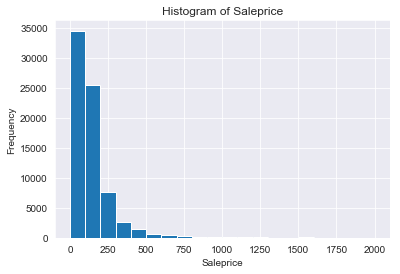

In [44]:
def drawHist(heights):
    plt.hist(heights, 20)
    plt.xlabel('Saleprice')
    plt.ylabel('Frequency')
    plt.title('Histogram of Saleprice')
    plt.show()
drawHist(data['Saleprice'])

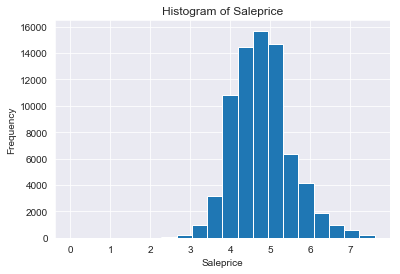

In [45]:
drawHist(data['log_price'])

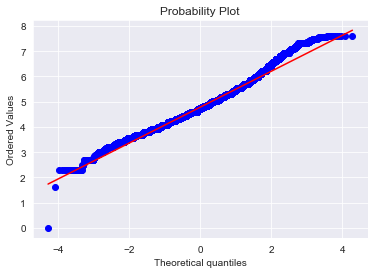

In [46]:

# plot probability distribution# plot  
fig = plt.figure()
res = stats.probplot(data['log_price'], plot=plt)
plt.show()

In [64]:
# deal with dates
import time
import datetime
def dif_time(date):
    now_time = datetime.datetime.now()
    now_time = now_time.strftime('%Y-%m-%d')
    d2 = datetime.datetime.strptime(now_time, '%Y-%m-%d')
    if str(date) !='nan':
        d1 = datetime.datetime.strptime(str(date),'%Y-%m-%d')
        day = (d2 - d1).days
        return day
    else:
        return None

In [65]:
#transform date to days
dates_to_transform=['first_review','host_since','last_review']
for col in dates_to_transform:
    data[col]=data[col].apply(dif_time)

In [66]:
for u in data.columns:
    if data[u].dtype==bool:
        data[u]=data[u].astype('int')

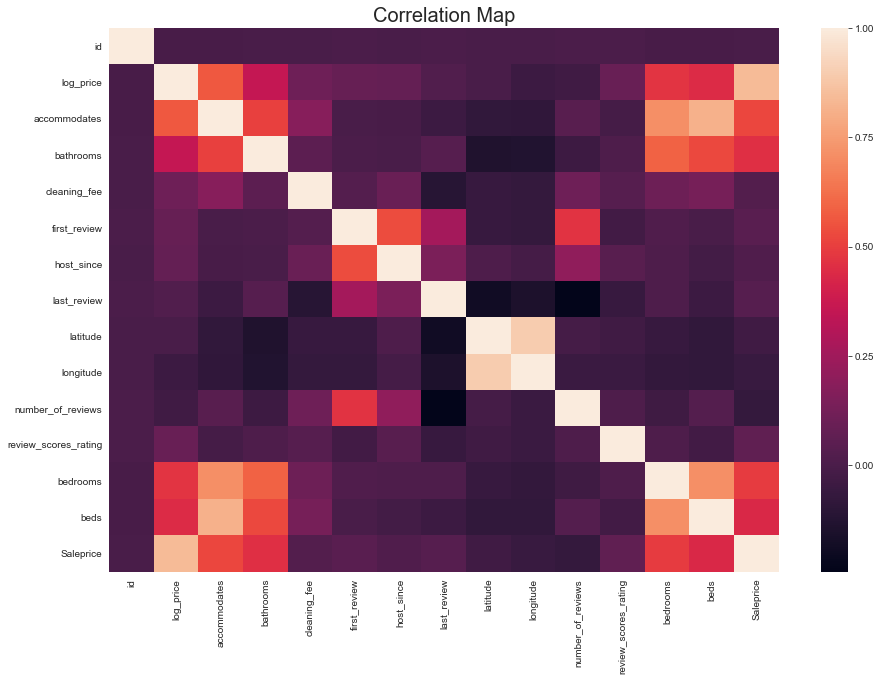

In [67]:
#plot correlation matrix
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

def correlation_map(df):
    correlation = data.corr()
    plt.subplots(figsize=(15,10))
    plt.title('Correlation Map', fontsize=20)
    sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
    
correlation_map(data)

In [51]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2)

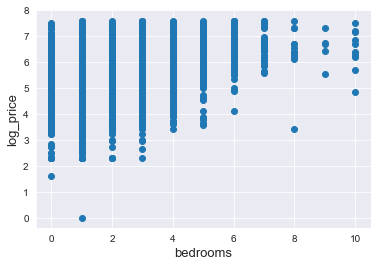

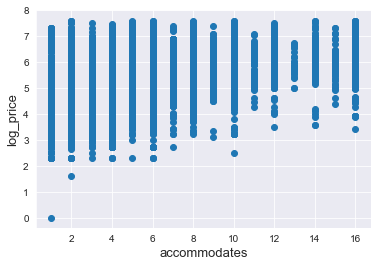

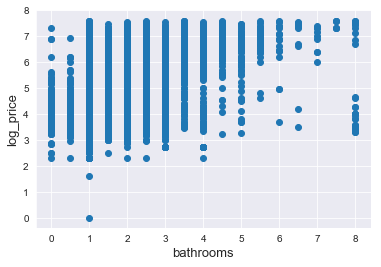

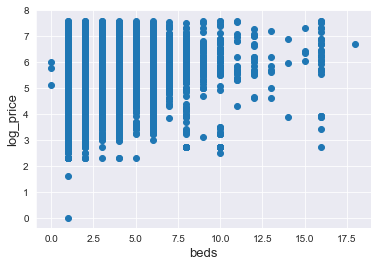

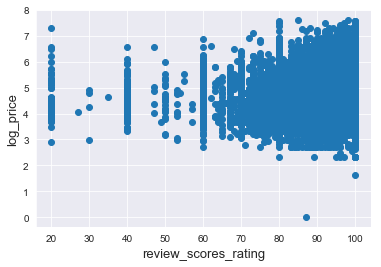

G:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x864 with 0 Axes>

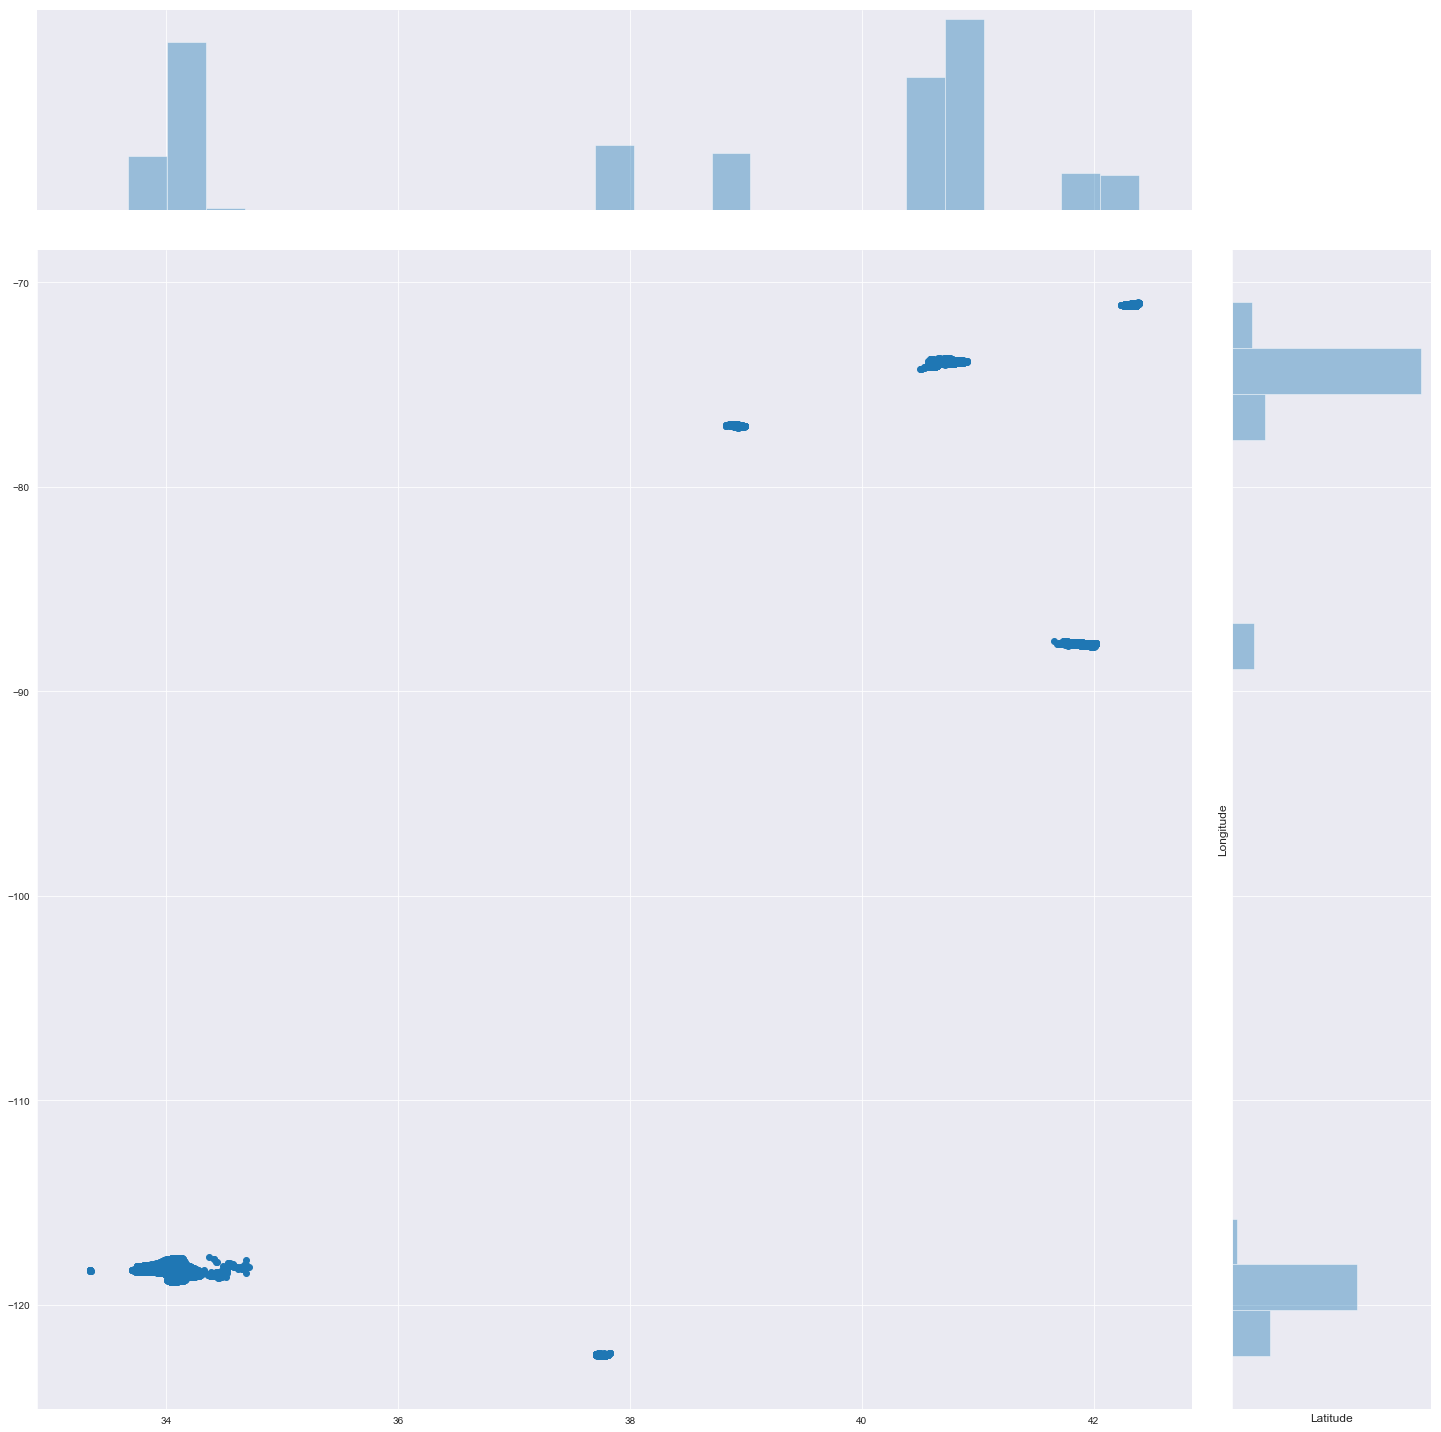

In [53]:
# scatter plot 
# log_price vs bedrooms
fig, ax = plt.subplots()
ax.scatter(train_data['bedrooms'], train_data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bedrooms', fontsize=13)
plt.show()

# log_price vs accomodates
fig, ax = plt.subplots()
ax.scatter(train_data['accommodates'], train_data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('accommodates', fontsize=13)
plt.show()

# log_price vs bathrooms
fig, ax = plt.subplots()
ax.scatter(train_data['bathrooms'], train_data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bathrooms', fontsize=13)
plt.show()

# log_price vs beds
fig, ax = plt.subplots()
ax.scatter(train_data['beds'], train_data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('beds', fontsize=13)
plt.show()

# log_price vs review_scores_rating
fig, ax = plt.subplots()
ax.scatter(train_data['review_scores_rating'], train_data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('review_scores_rating', fontsize=13)
plt.show()

# explore the latitude and longitude variable
plt.figure(figsize=(12,12))
sns.jointplot(x=train_data.latitude.values, y=train_data.longitude.values, size=20)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

(-0.5, 4.5, 0, 10)

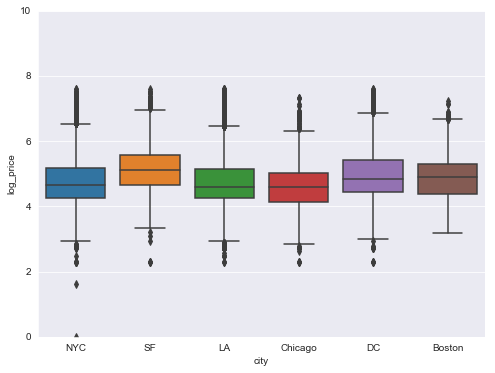

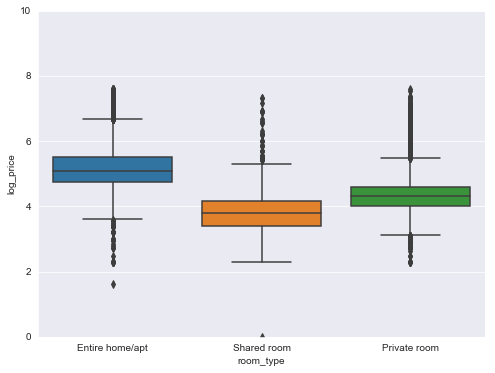

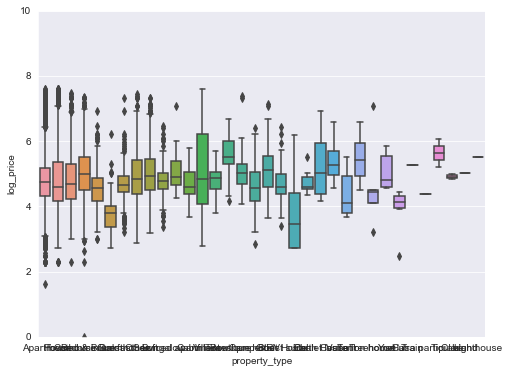

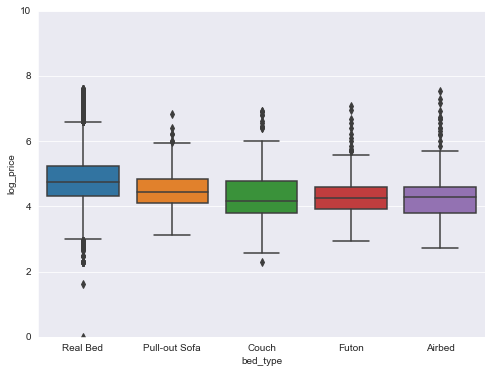

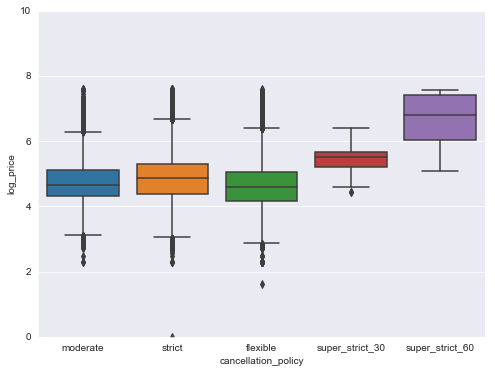

In [68]:
# box plot
# log_price vs city
var = 'city'
price_data = pd.concat([train_data['log_price'], train_data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs room_type
var = 'room_type'
price_data = pd.concat([train_data['log_price'], train_data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs property_type
var = 'property_type'
price_data = pd.concat([train_data['log_price'], train_data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs bed_type
var = 'bed_type'
price_data = pd.concat([train_data['log_price'], train_data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs cancellation_policy
var = 'cancellation_policy'
price_data = pd.concat([train_data['log_price'], train_data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

In [55]:
# #calculate missing data
# total_missing = data.isnull().sum()
# missing_ratio = (data.isnull().sum()/data.isnull().count())
# missing_data = pd.concat([total_missing, missing_ratio], axis=1, keys=['total_missing', 'missing_ratio'])
# missing_data = missing_data.ix[missing_data['missing_ratio']>0]
# missing_data = missing_data.sort_values(by='missing_ratio',ascending=False)
# missing_data.head(20)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,total_missing,missing_ratio


In [69]:
for col in train_data.columns:
    if train_data[col].isnull().sum() > 0:
        rate = train_data[col].isnull().sum() * 100 / train_data.shape[0]
        print(f'Column {col} has {rate:.4f}% missing values.')
    if train_data[col].dtype == 'object':
        if (train_data[col] == 'not available in demo dataset').sum() > 0:
            rate = (train_data[col] == 'not available in demo dataset').sum() * 100 / train_data.shape[0]
            print(f'Column {col} has {rate:.4f}% values not available in dataset.')

Column bathrooms has 0.2665% missing values.
Column first_review has 21.4192% missing values.
Column host_has_profile_pic has 0.2479% missing values.
Column host_identity_verified has 0.2479% missing values.
Column host_response_rate has 24.6087% missing values.
Column host_since has 0.2479% missing values.
Column last_review has 21.3787% missing values.
Column neighbourhood has 9.1722% missing values.
Column review_scores_rating has 22.5627% missing values.
Column thumbnail_url has 11.0646% missing values.
Column zipcode has 1.3072% missing values.
Column bedrooms has 0.1198% missing values.
Column beds has 0.1838% missing values.


ValueError: min() arg is an empty sequence

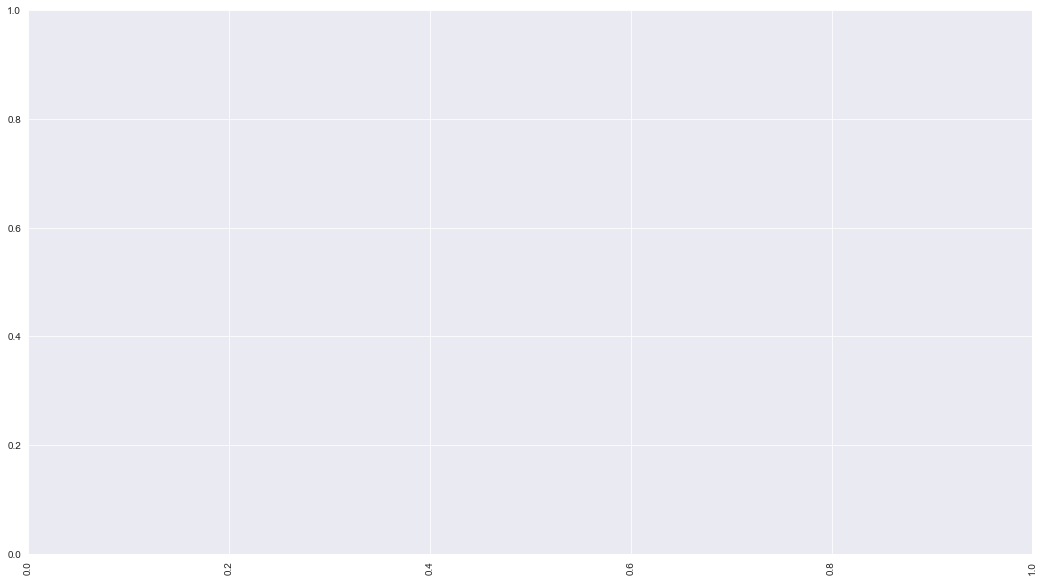

In [30]:

# #plot ratio of missing
# f, ax = plt.subplots(figsize=(18, 10))
# plt.xticks(rotation='90')
# sns.barplot(x=missing_data.index, y=missing_data.missing_ratio)
# plt.xlabel('properties', fontsize=18)
# plt.ylabel('Ratio of missing values', fontsize=18)
# plt.title('Ratio of missing data by properties', fontsize=20)

In [70]:

#missing_values#missin 
#delete column host_response_rate
data.drop('host_response_rate', axis=1, inplace=True)

In [71]:
# delete NA row
col_to_del=['neighbourhood','zipcode']
for col in col_to_del:
    data[col] = data[col].fillna('None')

In [72]:
data = data[(data.neighbourhood != 'None') & (data.zipcode != 'None')]

In [73]:
# fill NA by none
fillbynone=['first_review','host_since','last_review','host_has_profile_pic']
for col in fillbynone:
    data[col] = data[col].fillna('None')

In [74]:
# fill NA by 0
fillby0=['number_of_reviews']
for col in fillby0:
    data[col] = data[col].fillna('None')

In [75]:
#fill NA by numerical value
fillbymedian=['review_scores_rating']
for col in fillbymedian:
    data[col] = data[col].fillna(data[col].transform(lambda x: x.fillna(x.median())))

In [76]:
fillbymode=['bathrooms','beds','bedrooms']
for col in fillbymode:
    data[col] = data[col].fillna(data[col].mode()[0])

In [77]:
#check if there is any missing_value left
def left_missing(dataset):
    val = dataset.isnull().sum().max()
    if val>0:
        raise ValueError('There is still missing_value left!')
left_missing(data)

ValueError: There is still missing_value left!

In [78]:
# transform some variables to str
data['bedrooms'] = data['bedrooms'].apply(str)
data['bathrooms'] = data['bathrooms'].apply(str)
data['accommodates']=data['accommodates'].apply(str)
data['beds']=data['beds'].apply(str)

In [79]:
#Label Encoding some categorical variables that may contain information in their ordering set
col_to_str=['bedrooms','bathrooms','beds']
from sklearn.preprocessing import LabelEncoder
for c in col_to_str:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

In [80]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Saleprice
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,2,Real Bed,strict,1,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1,1,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,2,Real Bed,strict,1,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,4,11,169.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,2,Real Bed,moderate,1,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1,11,145.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2,Real Bed,flexible,1,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,96.0,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,3,10,750.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2,Real Bed,moderate,1,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0,1,115.0


In [81]:
# skewness
numeric_feats =data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 11 skewed numerical features to Box Cox transform


In [82]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2)

In [83]:
train_data.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Saleprice
38447,7875369,4.828314,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,3,Real Bed,moderate,1,...,-77.059105,Chic 1 Bedroom Georgetown Row House,Georgetown,11,96.0,https://a0.muscache.com/im/pictures/fc63f7d6-b...,20007,1,1,125.0
9741,4278801,4.369448,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Elev...",2,2,Real Bed,moderate,1,...,-118.288857,Thompson Place,Westlake,23,89.0,https://a0.muscache.com/im/pictures/d39fd8c3-4...,90057,1,1,79.0
30520,342965,5.164786,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets allow...",2,2,Real Bed,moderate,0,...,-122.426078,Private bedroom with spacious bathroom & firep...,Glen Park,7,94.0,https://a0.muscache.com/im/pictures/428db0b1-5...,94131,1,1,175.0
32645,13058496,5.164786,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,2,Real Bed,flexible,1,...,-73.948022,Comfort in Manhattan,Upper East Side,3,100.0,https://a0.muscache.com/im/pictures/de0df86b-7...,10128,1,1,175.0
37283,18274861,3.806662,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,2,Real Bed,strict,1,...,-77.003186,"Room in a colorful, sunny house!",Edgewood,75,99.0,https://a0.muscache.com/im/pictures/520df919-7...,20002,1,1,45.0


In [84]:
test_data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Saleprice
11366,13250484,5.768321,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Kitchen,Elevator,Heati...",4,2,Real Bed,strict,1,...,-73.988006,"Gorgeous, Classic NYC Apartment - Union Square",Gramercy Park,0,96.0,https://a0.muscache.com/im/pictures/d9914614-d...,10003,3,10,320.0
61234,13992082,3.583519,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,2,Real Bed,strict,1,...,-73.945017,"Private,clean, quiet room in BK.",Bedford-Stuyvesant,0,96.0,https://a0.muscache.com/im/pictures/4babfb1c-d...,11216,1,1,36.0
56856,18239876,5.075174,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,2,Real Bed,moderate,1,...,-71.057820,A Very Large Room - Lt Green Room,Dorchester,0,96.0,https://a0.muscache.com/im/pictures/4ef2b257-c...,02125,1,10,160.0
26922,15164786,4.859812,Townhouse,Entire home/apt,"{""Wireless Internet"",""Indoor fireplace"",Heatin...",4,2,Real Bed,strict,1,...,-73.947496,Hello Beautiful Entire Home with Private Backyard,Crown Heights,2,80.0,https://a0.muscache.com/im/pictures/54ae672c-2...,11216.0,1,10,129.0
10025,6817378,5.010635,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Pets...",6,5,Real Bed,flexible,1,...,-118.204507,Charming & modern hillside bungalow,Highland Park,0,96.0,NaN,90042,3,10,150.0


In [85]:
print (len(train_data))
print (len(test_data))

53328
13332


In [86]:
train_data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'Saleprice'],
      dtype='object')

In [87]:
len(train_data.columns)

29

In [88]:
#if one column only has one value, consider to delete the column
train_columns_to_remove = [col for col in train_data.columns if train_data[col].nunique() == 1]
test_columns_to_remove = [col for col in test_data.columns if test_data[col].nunique() == 1]

In [89]:
print(train_columns_to_remove)
print(test_columns_to_remove)

[]
[]


In [90]:
# deal with dates
import time
import datetime
def dif_time(date):
    now_time = datetime.datetime.now()
    now_time = now_time.strftime('%Y-%m-%d')
    d2 = datetime.datetime.strptime(now_time, '%Y-%m-%d')
    if str(date) != 'nan':
        d1 = datetime.datetime.strptime(str(date), '%Y-%m-%d')
        day = (d2 - d1).days
        return day
    else:
        return None

In [91]:
X = data.drop("log_price",axis=1).values
y = data["log_price"].values

In [92]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
for col in data.columns:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train_data[col].values.astype('str')) + list(test_data[col].values.astype('str')))
    train_data[col] = lbl.transform(list(train_data[col].values.astype('str')))
    test_data[col] = lbl.transform(list(test_data[col].values.astype('str')))

id


G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


log_price
property_type
room_type
amenities
accommodates
bathrooms
bed_type
cancellation_policy
cleaning_fee
city
description
first_review
host_has_profile_pic
host_identity_verified
host_since
instant_bookable
last_review
latitude
longitude
name
neighbourhood
number_of_reviews
review_scores_rating
thumbnail_url
zipcode
bedrooms
beds
Saleprice


In [95]:
from sklearn.model_selection import TimeSeriesSplit

In [96]:
from sklearn.model_selection import KFold #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
import lightgbm as lgb

In [97]:
params = {"objective" : "regression", "metric" : "rmse", "max_depth": 8, "min_child_samples": 20, "reg_alpha": 0.2, "reg_lambda": 0.2,
        "num_leaves" : 257, "learning_rate" : 0.01, "subsample" : 0.9, "colsample_bytree" : 0.9, "subsample_freq ": 5}
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=False, random_state=42)
# Cleaning and defining parameters for LGBM
model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)

In [98]:
#train = train.sort_values('date')
X = train_data.drop('log_price', axis=1)
y = train_data['log_price']
X_test = test_data.drop('log_price', axis=1)
# I use TimeSeriesSplit as we have time series
tscv = TimeSeriesSplit(n_splits=10)

In [99]:
prediction = np.zeros(test_data.shape[0])

for fold_n, (train_index, test_index) in enumerate(folds.split(X)):
    print('Fold:', fold_n)
    #print(f'Train samples: {len(train_index)}. Valid samples: {len(test_index)}')
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    

    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
            verbose=500, early_stopping_rounds=10)
    
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    prediction += y_pred
prediction /= n_fold

Fold: 0
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 38.3151	valid_1's rmse: 45.7595
[1000]	training's rmse: 33.4206	valid_1's rmse: 43.1874
Early stopping, best iteration is:
[1215]	training's rmse: 32.2162	valid_1's rmse: 42.8272
Fold: 1
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 37.9491	valid_1's rmse: 46.8971
[1000]	training's rmse: 33.2536	valid_1's rmse: 44.7026
[1500]	training's rmse: 30.166	valid_1's rmse: 43.2834
[2000]	training's rmse: 27.506	valid_1's rmse: 42.3094
Early stopping, best iteration is:
[2096]	training's rmse: 27.0171	valid_1's rmse: 42.1849
Fold: 2
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 37.9402	valid_1's rmse: 48.8907
[1000]	training's rmse: 33.0204	valid_1's rmse: 46.8453
[1500]	training's rmse: 29.7605	valid_1's rmse: 45.7003
[2000]	training's rmse: 27.1824	valid_1's rmse: 44.9238
Early stopping, best iteration is:
[2386]	training's 

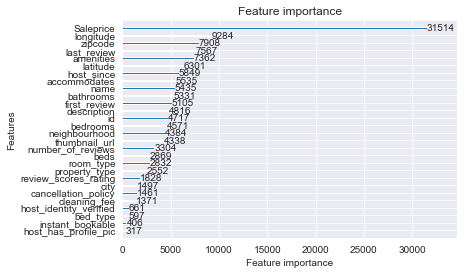

In [100]:
lgb.plot_importance(model, max_num_features=30);

In [101]:
from catboost import CatBoostRegressor

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [103]:
model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             #metric_period = 50,
                             od_wait=20)
model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              use_best_model=True,
              verbose=True)
    
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)



0:	learn: 173.5279373	test: 172.8503519	best: 172.8503519 (0)	total: 869ms	remaining: 14m 27s
1:	learn: 159.5209569	test: 158.9416485	best: 158.9416485 (1)	total: 1.85s	remaining: 15m 22s
2:	learn: 147.0596263	test: 146.5795099	best: 146.5795099 (2)	total: 2.83s	remaining: 15m 40s
3:	learn: 136.2838006	test: 135.9202150	best: 135.9202150 (3)	total: 3.84s	remaining: 15m 55s
4:	learn: 126.3724436	test: 126.1050784	best: 126.1050784 (4)	total: 4.83s	remaining: 16m 1s
5:	learn: 117.6252793	test: 117.4969513	best: 117.4969513 (5)	total: 5.83s	remaining: 16m 5s
6:	learn: 110.0486109	test: 110.0320698	best: 110.0320698 (6)	total: 6.9s	remaining: 16m 18s
7:	learn: 103.3662082	test: 103.3310757	best: 103.3310757 (7)	total: 7.92s	remaining: 16m 22s
8:	learn: 98.1558472	test: 98.1513253	best: 98.1513253 (8)	total: 8.01s	remaining: 14m 41s
9:	learn: 93.2100258	test: 93.2846471	best: 93.2846471 (9)	total: 9.11s	remaining: 15m 1s
10:	learn: 88.7598325	test: 88.9096864	best: 88.9096864 (10)	total: 10

89:	learn: 51.7175378	test: 53.2484749	best: 53.2484749 (89)	total: 1m 5s	remaining: 11m
90:	learn: 51.7174710	test: 53.2481541	best: 53.2481541 (90)	total: 1m 5s	remaining: 10m 52s
91:	learn: 51.6967669	test: 53.2360673	best: 53.2360673 (91)	total: 1m 5s	remaining: 10m 47s
92:	learn: 51.4252559	test: 53.0623148	best: 53.0623148 (92)	total: 1m 6s	remaining: 10m 48s
93:	learn: 51.2940203	test: 52.8970437	best: 52.8970437 (93)	total: 1m 7s	remaining: 10m 48s
94:	learn: 51.0632096	test: 52.7159329	best: 52.7159329 (94)	total: 1m 8s	remaining: 10m 48s
95:	learn: 50.9290735	test: 52.5753029	best: 52.5753029 (95)	total: 1m 8s	remaining: 10m 48s
96:	learn: 50.9181006	test: 52.5625449	best: 52.5625449 (96)	total: 1m 9s	remaining: 10m 48s
97:	learn: 50.7693338	test: 52.4731696	best: 52.4731696 (97)	total: 1m 10s	remaining: 10m 48s
98:	learn: 50.6512077	test: 52.3032897	best: 52.3032897 (98)	total: 1m 10s	remaining: 10m 45s
99:	learn: 50.5533407	test: 52.1592331	best: 52.1592331 (99)	total: 1m 1

178:	learn: 47.6100534	test: 49.6435135	best: 49.6435135 (178)	total: 1m 41s	remaining: 7m 45s
179:	learn: 47.6100533	test: 49.6435160	best: 49.6435135 (178)	total: 1m 41s	remaining: 7m 42s
180:	learn: 47.6097093	test: 49.6432613	best: 49.6432613 (180)	total: 1m 41s	remaining: 7m 39s
181:	learn: 47.6097092	test: 49.6432635	best: 49.6432613 (180)	total: 1m 41s	remaining: 7m 36s
182:	learn: 47.6097091	test: 49.6432654	best: 49.6432613 (180)	total: 1m 41s	remaining: 7m 33s
183:	learn: 47.6093447	test: 49.6431083	best: 49.6431083 (183)	total: 1m 41s	remaining: 7m 31s
184:	learn: 47.6093409	test: 49.6430964	best: 49.6430964 (184)	total: 1m 41s	remaining: 7m 29s
185:	learn: 47.6092959	test: 49.6426538	best: 49.6426538 (185)	total: 1m 42s	remaining: 7m 26s
186:	learn: 47.6092958	test: 49.6426551	best: 49.6426538 (185)	total: 1m 42s	remaining: 7m 23s
187:	learn: 47.6090160	test: 49.6424887	best: 49.6424887 (187)	total: 1m 42s	remaining: 7m 21s
188:	learn: 47.6090159	test: 49.6424899	best: 49.6